In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.ndimage import gaussian_filter

## Generating dummy place cells.
Based on Homework 3, question 5

In [2]:
def firing_rate_scalar(stimulus=[50, 50], mu=[50, 50], sigma=20):
    '''
        The stimulus is a specific coordinate in the (x,y) plane.
        mu is the center fo a specific neuron's place cell.
    '''
    A = 1500/(np.sqrt(2*np.pi*sigma**2))
    numerator = (stimulus[0] - mu[0])**2 + (stimulus[1] - mu[1])**2
    return A*np.exp(-numerator/(2*sigma**2))


def firing_rate_vectorized(X, Y, mu=[50, 50], sigma=20):
    length = len(X)
    if length != len(Y):
        print("The dimensions do not match.")
        
    mat = []
    for i in range(length):
        row = np.zeros(length)
        for j in range(length):
            row[j] = firing_rate_scalar([X[i][j], Y[i][j]], mu, sigma)
#             print(np.array(firing_rate_vec(xx, yy, mu, sigma)))
        mat.append(np.array(row))
#     return A*np.exp(-numerator/(2*sigma**2))
    return mat

In [3]:
# how to go from a firing rate to a spike train? Using a stimulus!
firing_rate = firing_rate_scalar([0,0])
firing_rate

0.057760483148779525

In [4]:
def matrix(pixels_n=512, mu=[50, 50], sigma=32):
    
    # Initializing meshgrid
    x = range(pixels_n)
    y = range(pixels_n)

    # Provides a coordinate grid
    X, Y = np.meshgrid(x, y)
    z = firing_rate_vectorized(X, Y, mu, sigma)

    return z

In [5]:
zz1 = matrix(512, [450, 450], 50)

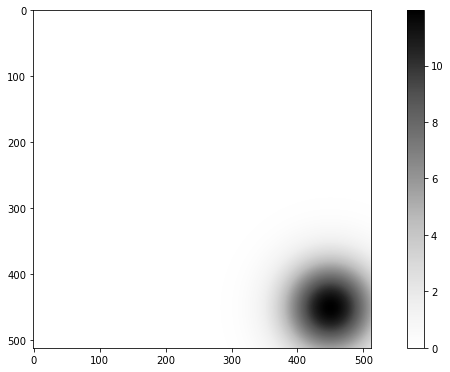

In [6]:
plt.figure(figsize=(7,7))

ax = plt.subplot()
im = ax.imshow(zz1, cmap='Greys')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html# 

# https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.5 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)

plt.colorbar(im, cax=cax)

plt.show()

In [7]:
# So now we can create a poisson spike rate generator which is modulated by the previous firing rate.
# But first, we need a random walk in 2D!

In [95]:
# Random walk

def possibilities(x0,y0):
# Let's suppose the random walk can only occur at steps of legth 1 in 4 possible directions based on the current one.
    luck = rd.random()
    
    if luck < 0.25: # east
        x0 = x0 + 1

    elif luck < 0.5: # west
        x0 = x0 - 1
        
    elif luck < 0.75: # north
        y0 = y0 + 1
    else:# south
        y0 = y0 - 1
    return [x0,y0]

#Let's consider that instead of rectangular coordinates, we consider polar ones: variable raidus and angle.
def polar_possibilities(x0, y0, pixels_n=500):
    luck_r = 80*rd.random()
    luck_theta = rd.random()
    
    x0 = x0 + luck_r*np.cos(2*np.pi*luck_theta)
    y0 = y0 + luck_r*np.sin(2*np.pi*luck_theta)
    
    # Boundary conditions. Going in the opposite direction when colliding against walls:
    if x0 < 0 or x0 > pixels_n:
        x0 = x0 - luck_r*np.cos(2*np.pi*luck_theta)
    if y0 < 0 or y0 > pixels_n:
        y0 = y0 - luck_r*np.sin(2*np.pi*luck_theta)
    
    return [int(x0),int(y0)]


def random_walk(pixels_n=500, steps=100):
    x_pos = np.zeros(steps)
    y_pos = np.zeros(steps)
    
    x_pos[0], y_pos[0] = int(rd.random()*pixels_n), int(rd.random()*pixels_n)
    
    for i in range(1, steps):
#         x_pos[i], y_pos[i] = test_behavior(x_pos[i-1], y_pos[i-1], pixels_n)
        x_pos[i], y_pos[i] = polar_possibilities(x_pos[i-1], y_pos[i-1], pixels_n)
#         x_pos[i], y_pos[i] = possibilities(x_pos[i-1], y_pos[i-1])
    
    return [x_pos, y_pos]



# Now, we know this random walker actually has a tendency to explore the objects placed in specific locations
# During the test part of the experiment.

# def test_behavior(x0, y0, pixels_n=512, attractor=[100, 100]): #skewed walker
#     luck_r = 80*rd.random()
#     luck_theta = rd.random()
    
#     # This is not the proper way to skew the random walker.
#     x0 = x0 + luck_r*np.cos(2*np.pi*luck_theta*(x0-attractor[0]))
#     y0 = y0 + luck_r*np.sin(2*np.pi*luck_theta*(y0-attractor[1]))
    
#     # Boundary conditions. Going in the opposite direction when colliding against walls:
#     if x0 < 0 or x0 > pixels_n:
#         x0 = x0 - 2*luck_r*np.cos(2*np.pi*luck_theta*(x0-attractor[0]))
#     if y0 < 0 or y0 > pixels_n:
#         y0 = y0 - 2*luck_r*np.sin(2*np.pi*luck_theta*(y0-attractor[1]))
    
#     return [x0,y0]

In [96]:
x_pos, y_pos = random_walk(200, 200)
# x_pos, y_pos = test_behavior()

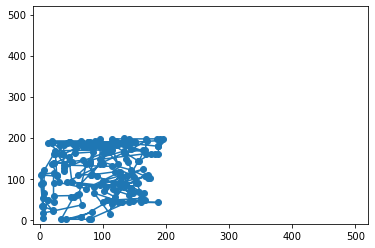

In [97]:
plt.plot(x_pos, y_pos, marker="o")
plt.ylim([-10, 520])
plt.xlim([-10, 520])
plt.show()

In [169]:
def place_cells(cells=100, open_field = 500, sigmas=[50, 200]):
    place_fields = []
    factor = max(sigmas)/min(sigmas)
    
    for cell in range(cells):
        sigma = rd.random()*factor + min(sigmas)
        mu = [rd.random()*open_field, rd.random()*open_field]
        zz = matrix(open_field, mu, sigma)
        place_fields.append(np.array(zz))
    return place_fields

In [170]:
place_fields = place_cells(10)

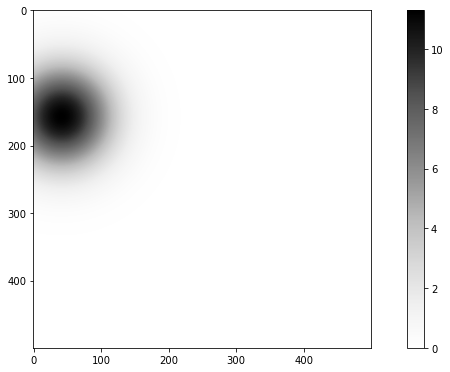

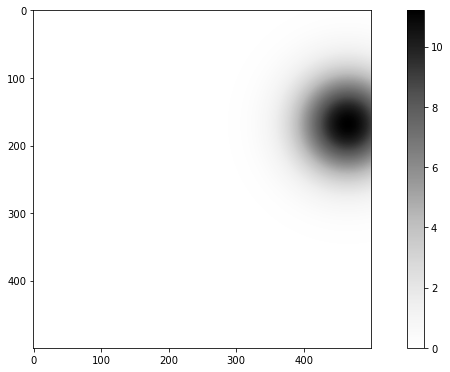

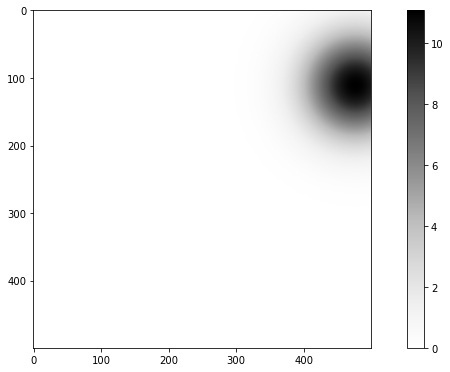

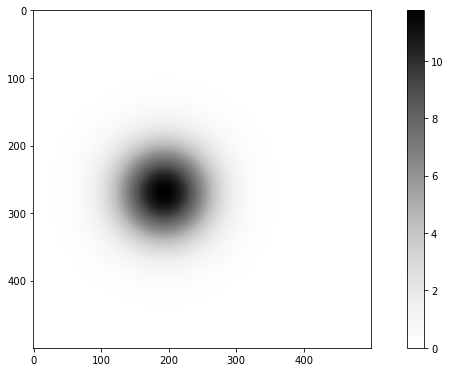

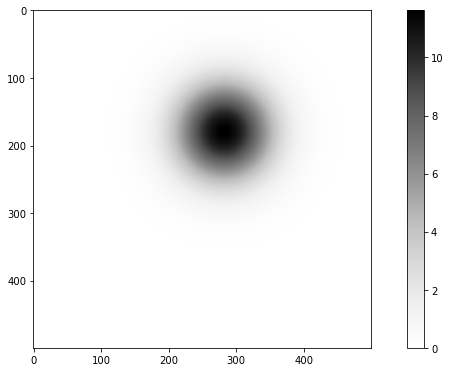

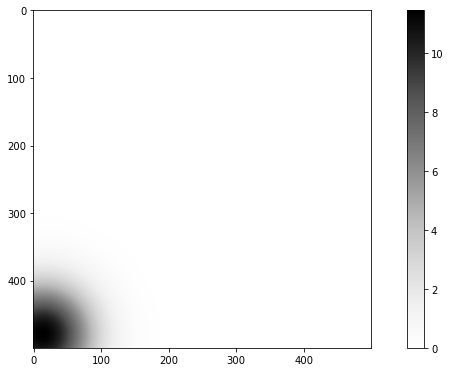

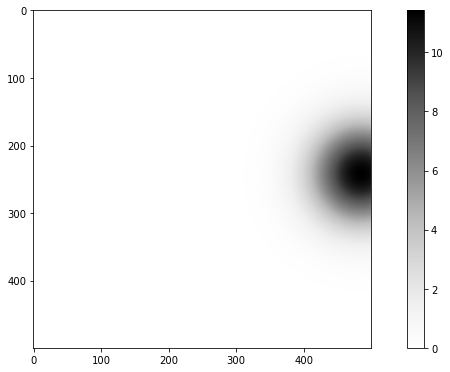

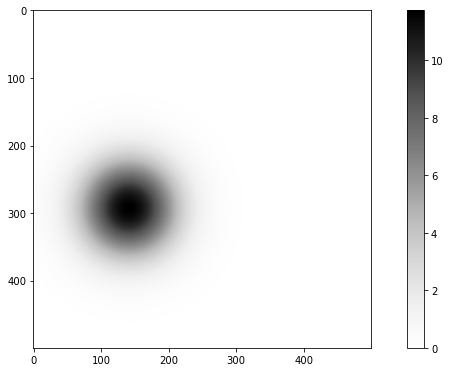

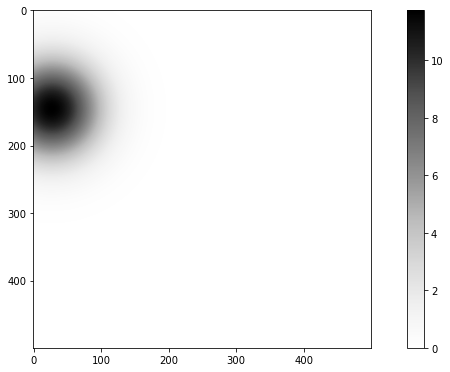

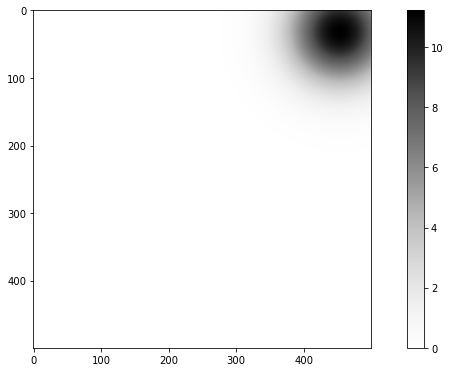

In [171]:
for i in range(len(place_fields)):
    plt.figure(figsize=(7,7))

    ax = plt.subplot()
    im = ax.imshow(place_fields[i], cmap='Greys')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html# 

    # https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
    # create an Axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.5 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)

    plt.colorbar(im, cax=cax)

    plt.show()

In [172]:
# Now that we have place fields, this will be the stimulus input to the poisson_function..

In [173]:
def firing_rate(cell_number, open_field = 500, sigmas=[50, 200], steps=100): 
    '''rate: is in Hz, 1/s
       dt: 1 ms
       1 s spike trains
    '''
    place_fields = place_cells(cell_number, open_field, sigmas)
    x_pos, y_pos = random_walk(open_field, steps)
    fr = []
    
    for cell_i in range(cell_number):
        cell_i_firing_rates = np.zeros(steps)
        
        for i in range(steps):
            cell_i_firing_rates[i] = place_fields[cell_i][int(x_pos[i])][int(y_pos[i])]
        fr.append(cell_i_firing_rates)
    return fr, x_pos, y_pos, place_fields


def location_dependent_average_firing_rate(cell_number=1, open_field = 500, sigmas=[50, 200], steps=200):
    fr, x_pos, y_pos, place_fields = firing_rate(cell_number, open_field, sigmas, steps)
    
    for cell_i in range(cell_number):
#         cell_i_firing_rates = np.zeros(steps)
        z = np.array([ [0]*open_field for i in range(open_field)], dtype=float)
        for i in range(len(fr[cell_i])):
            xx = int(x_pos[i])
            yy = int(y_pos[i])

            if float(z[xx][yy]) == 0:
                z[xx][yy] = float(fr[cell_i][i])
            else: # There is a previous value, so we will obtain an average. This is bad practice, but we'll keep it for now
                z[xx][yy] = float((z[xx][yy] + fr[cell_i][i])/2)
    return np.array(z), x_pos, y_pos, place_fields

In [215]:
# Sanity check. Confirming the indices correspond to every figure.
# Create some dummy ones you actually know and see if you obtain the expected figure.

open_field = 10 #500
sigmas=[1, 1] #[50, 100]
steps=300 #100

z, x_pos, y_pos, place_fields = location_dependent_average_firing_rate(1, open_field, sigmas, steps)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html#scipy.ndimage.gaussian_filter
smoothed_z = gaussian_filter(z, sigma=1) #20

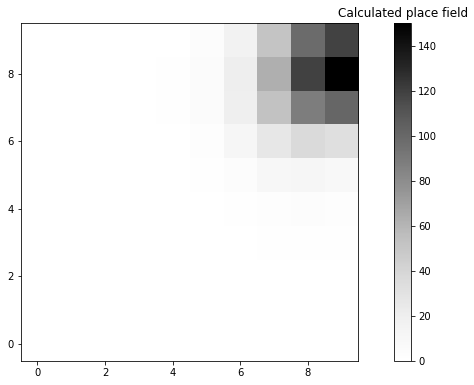

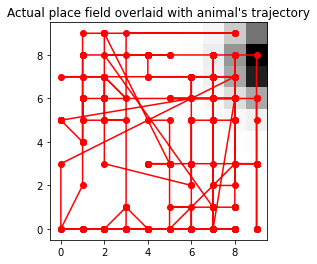

In [216]:
plt.figure(figsize=(7,7))

ax = plt.subplot()
im = ax.imshow(smoothed_z, cmap='Greys', origin = 'lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.title("Calculated place field")
plt.show()

plt.imshow(place_fields[0], cmap='Greys', origin = 'lower')
plt.plot(x_pos, y_pos, marker="o", c="r")
plt.title("Actual place field overlaid with animal's trajectory")
plt.show()

In [217]:
# fr, x_pos, y_pos = firing_rate(5, open_field = 500, sigmas=[50, 200], steps=100)

# I feel I am getting lost in the code.
# Now, for every time step, there is a firing rate associated to that location.
# Generate a spike train with these varying firing rates.

# Then, you can smooth over a certain region for these spikes and reconstuct the place field.

In [231]:
def varying_firing_rate(cell_number, open_field = 500, sigmas=[50, 200], steps=100): 
    '''rate: is in Hz, 1/s
       1 s spike trains
    '''
    place_fields = place_cells(cell_number, open_field, sigmas)
    x_pos, y_pos = random_walk(open_field, steps)
    fr = []
    dt = int(1/steps)
    spikes_all = []
    for cell_i in range(cell_number):
        cell_i_firing_rates = np.zeros(steps)
        spikes = np.full(steps, False) #boolean
        
        for i in range(steps):
            cell_i_firing_rates[i] = place_fields[cell_i][int(x_pos[i])][int(y_pos[i])]
            if np.random.rand() < cell_i_firing_rates[i]*dt: # You can change this to use the interspike method, more computationally effective
                spikes[i] = True
                
        fr.append(cell_i_firing_rates)
        spikes_all.append(spikes)
    return fr, x_pos, y_pos, place_fields, np.array(spikes_all)

# Modify the following function for your goals.
# def location_dependent_average_firing_rate(cell_number=1, open_field = 500, sigmas=[50, 200], steps=200):
#     fr, x_pos, y_pos, place_fields = firing_rate(cell_number, open_field, sigmas, steps)
    
#     for cell_i in range(cell_number):
# #         cell_i_firing_rates = np.zeros(steps)
#         z = np.array([ [0]*open_field for i in range(open_field)], dtype=float)
#         for i in range(len(fr[cell_i])):
#             xx = int(x_pos[i])
#             yy = int(y_pos[i])

#             if float(z[xx][yy]) == 0:
#                 z[xx][yy] = float(fr[cell_i][i])
#             else: # There is a previous value, so we will obtain an average. This is bad practice, but we'll keep it for now
#                 z[xx][yy] = float((z[xx][yy] + fr[cell_i][i])/2)
#     return np.array(z), x_pos, y_pos, place_fields

In [232]:
fr, x_pos, y_pos, place_fields, spikes_all = varying_firing_rate(1, open_field = 10, sigmas=[1, 1], steps=100)

In [237]:
min(fr[0])
max(fr[0])

347.7336663667112

In [233]:
spikes_all

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]])

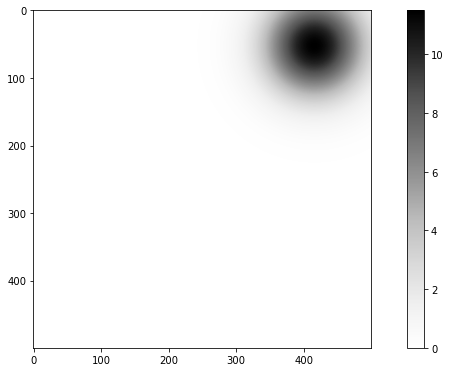

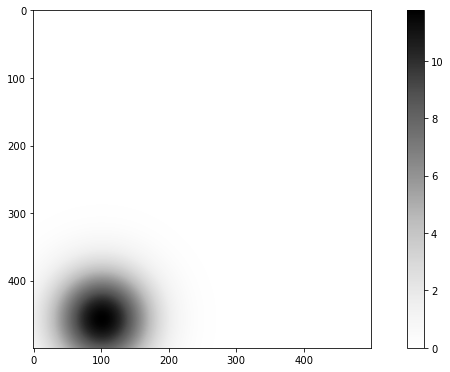

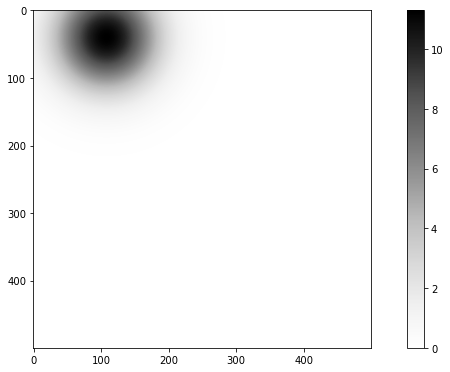

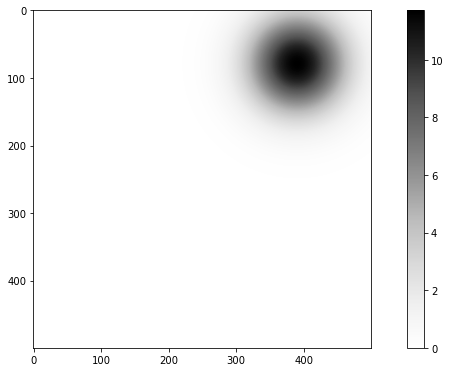

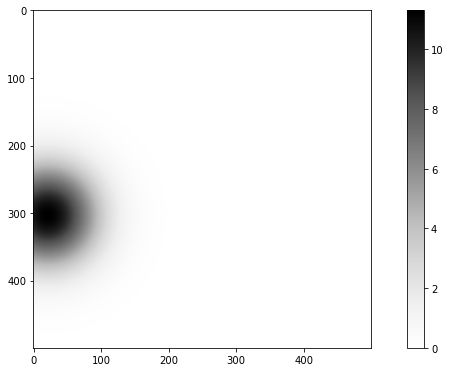

In [22]:
for i in range(5):
    plt.figure(figsize=(7,7))

    ax = plt.subplot()
    im = ax.imshow(place_fields[i], cmap='Greys')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html# 

    # https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
    # create an Axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.5 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)

    plt.colorbar(im, cax=cax)

    plt.show()

In [ ]:
# Code taken from HW #3
# Create a homogeneuous Poisson function.
# https://en.wikipedia.org/wiki/Poisson_point_process
# 1 s spike trains, generate 100.
def poisson_function(rate = 10, train_number=1, dt=0.001): 
    '''rate: is in Hz, 1/s
       dt: 1 ms
    '''

    total_time = int(dt**(-1))
    trains = []  

    for train_i in range(train_number):
        spikes = np.full(total_time, False) #boolean

        for i in range(total_time):
            if np.random.rand() < rate*dt: # You can change this to use the interspike method, more computationally effective
                spikes[i] = True

        trains.append(spikes)
    return trains, [i*dt for i in range(total_time)]

# def location_dependent_average_firing_rate(cell_number=1, open_field = 500, sigmas=[50, 200], steps=200):
#     fr, x_pos, y_pos, place_fields = firing_rate(cell_number, open_field, sigmas, steps)
    
#     for cell_i in range(cell_number):
# #         cell_i_firing_rates = np.zeros(steps)
#         z = np.array([ [0]*open_field for i in range(open_field)], dtype=float)
#         for i in range(len(fr[cell_i])):
#             xx = int(x_pos[i])
#             yy = int(y_pos[i])

#             if float(z[xx][yy]) == 0:
#                 z[xx][yy] = float(fr[cell_i][i])
#             else: # There is a previous value, so we will obtain an average. This is bad practice, but we'll keep it for now
#                 z[xx][yy] = float((z[xx][yy] + fr[cell_i][i])/2)
#     return np.array(z), x_pos, y_pos, place_fields

In [ ]:
train_number = 100
trains, time_vec = poisson_function(train_number)

In [ ]:
plt.figure(figsize=(15,15))
index = 0

for trial_i in trains:
    plt.scatter(np.array(time_vec)[trial_i], trial_i[trial_i]+index, marker='|', c="k") # truth_values acts like a mask
    index +=1
    
plt.ylabel("Firing rate")
plt.xlabel("Time [s]")
plt.title("Simulated firing rate for 100 neurons")
plt.show()

In [ ]:
# Use the interspike interval method described on page 27 of DA to calculate the time between spikes

new_times = [0.001*i for i in range(1000)] # 1 s divided in intervals of 1 ms
leng = len(trains)

time_when_spike = [np.array(new_times)[trail_i] for trail_i in trains]
intervals = np.zeros(leng)
intervals_stdv = np.zeros(leng)
index = 0

for times_i in time_when_spike:
    new_interval_vec = []
    
    for i in range(len(times_i)-1):
        new_interval_vec.append(times_i[i+1]-times_i[i])
        
    intervals[index] = np.mean(new_interval_vec)
    intervals_stdv[index] = np.std(new_interval_vec)
    index +=1
    
# If we consider the mean across the 100 trials,
print("The average time between spikes, that is, the interspike interval is given by the mean of the 100 trials:",
      np.round(np.mean(intervals), 4))

In [ ]:
plt.plot(intervals, c="k", label = "measured interspike itnerval", marker="o")
plt.axhline(y=0.05, c="b", label="expected interspike interval")
plt.axhline(y=np.mean(np.mean(intervals)), c="r", label="average interspike interval")
plt.xlabel("Trial number")
plt.ylabel("Interspike interval")
plt.legend()
plt.show()